In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import shap
shap.initjs()

In [40]:
from google.colab import drive
drive .mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [41]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/dengue.csv")
data.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [42]:
print(data.head())
print(data.info())
print(data.describe())

   Gender  Age  NS1  IgG  IgM        Area     AreaType HouseType District  \
0  Female   45    0    0    0      Mirpur  Undeveloped  Building    Dhaka   
1    Male   17    0    0    1  Chawkbazar    Developed  Building    Dhaka   
2  Female   29    0    0    0      Paltan  Undeveloped     Other    Dhaka   
3  Female   63    1    1    0   Motijheel    Developed     Other    Dhaka   
4    Male   22    0    0    0    Gendaria  Undeveloped  Building    Dhaka   

   Outcome  
0        0  
1        0  
2        0  
3        1  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7

In [43]:
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Area'] = label_encoder.fit_transform(data['Area'])
data['AreaType'] = label_encoder.fit_transform(data['AreaType'])
data['HouseType'] = label_encoder.fit_transform(data['HouseType'])

In [44]:
data.shape

(1000, 10)

In [45]:
#Checking the null value
data.isnull().sum()

,0
Gender,0
Age,0
NS1,0
IgG,0
IgM,0
Area,0
AreaType,0
HouseType,0
District,0
Outcome,0


In [46]:
#Duplicate value check
data.duplicated().sum()

4

In [47]:
#Identify the garbage values
for i in data.select_dtypes(include=['object']).columns:
  print(data[i].value_counts())
  print("***"*10)

District
Dhaka    1000
Name: count, dtype: int64
******************************


# **Step-4: Exploratory Data Analysis(EDA)**

In [48]:
#Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,1000.0,0.476,0.499674,0.0,0.00,0.0,1.0,1.0
Age,1000.0,35.924,16.468437,8.0,22.00,37.0,50.0,65.0
NS1,1000.0,0.519,0.499889,0.0,0.00,1.0,1.0,1.0
IgG,1000.0,0.533,0.499159,0.0,0.00,1.0,1.0,1.0
IgM,1000.0,0.475,0.499624,0.0,0.00,0.0,1.0,1.0
Area,1000.0,17.311,10.303127,0.0,8.75,17.0,26.0,35.0
AreaType,1000.0,0.499,0.500249,0.0,0.00,0.0,1.0,1.0
HouseType,1000.0,0.963,0.818719,0.0,0.00,1.0,2.0,2.0
Outcome,1000.0,0.533,0.499159,0.0,0.00,1.0,1.0,1.0


In [49]:
data.describe(include='object').T

,count,unique,top,freq
District,1000,1,Dhaka,1000


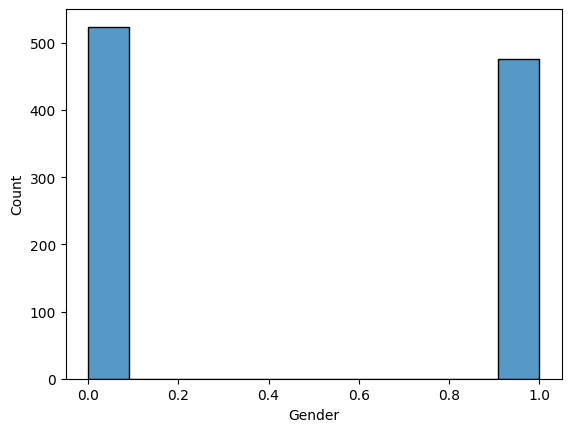

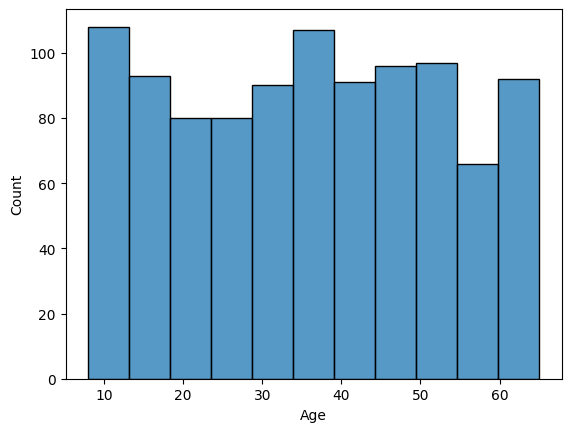

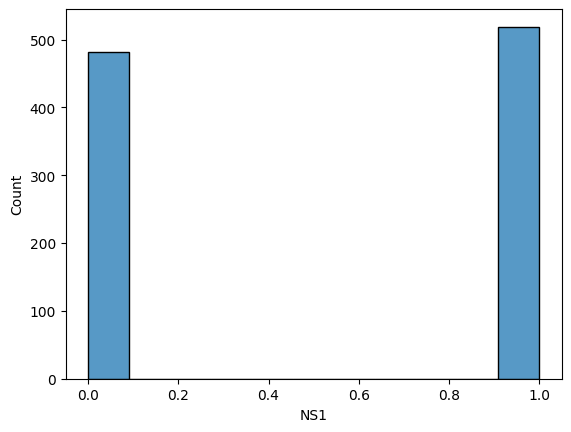

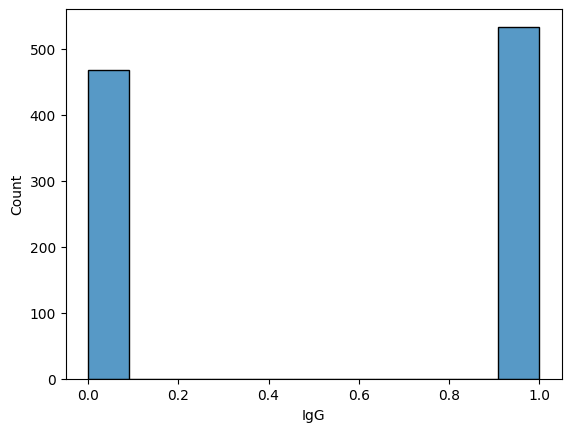

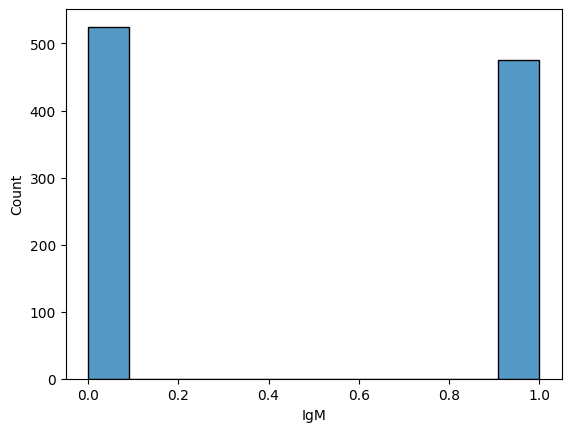

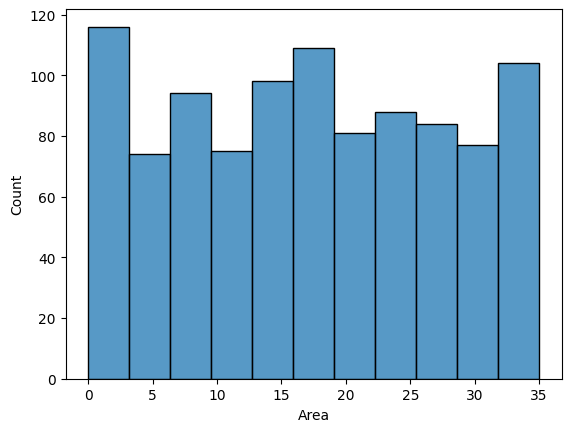

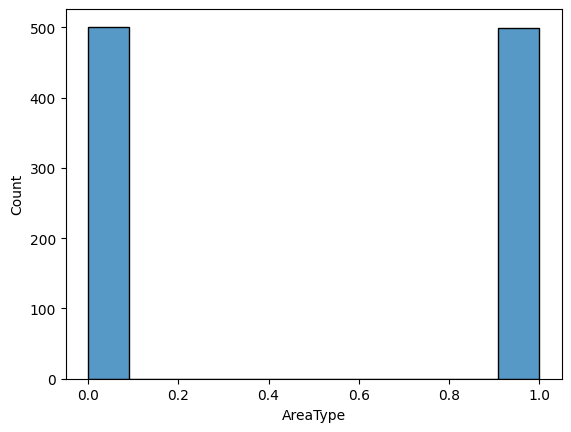

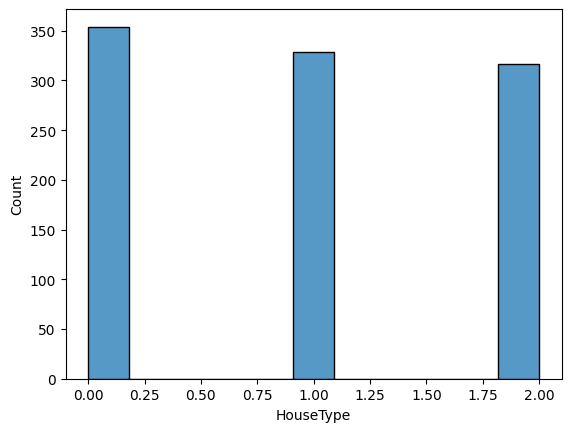

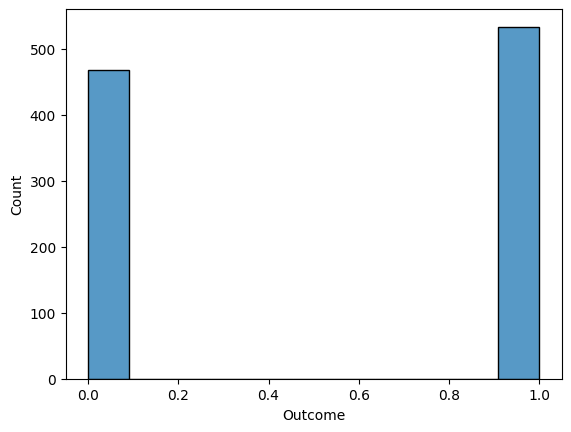

In [50]:
#histogram to undersrtand the distribution of data
for i in data.select_dtypes(include="number").columns:
  sns.histplot(data=data,x=i)
  plt.show()

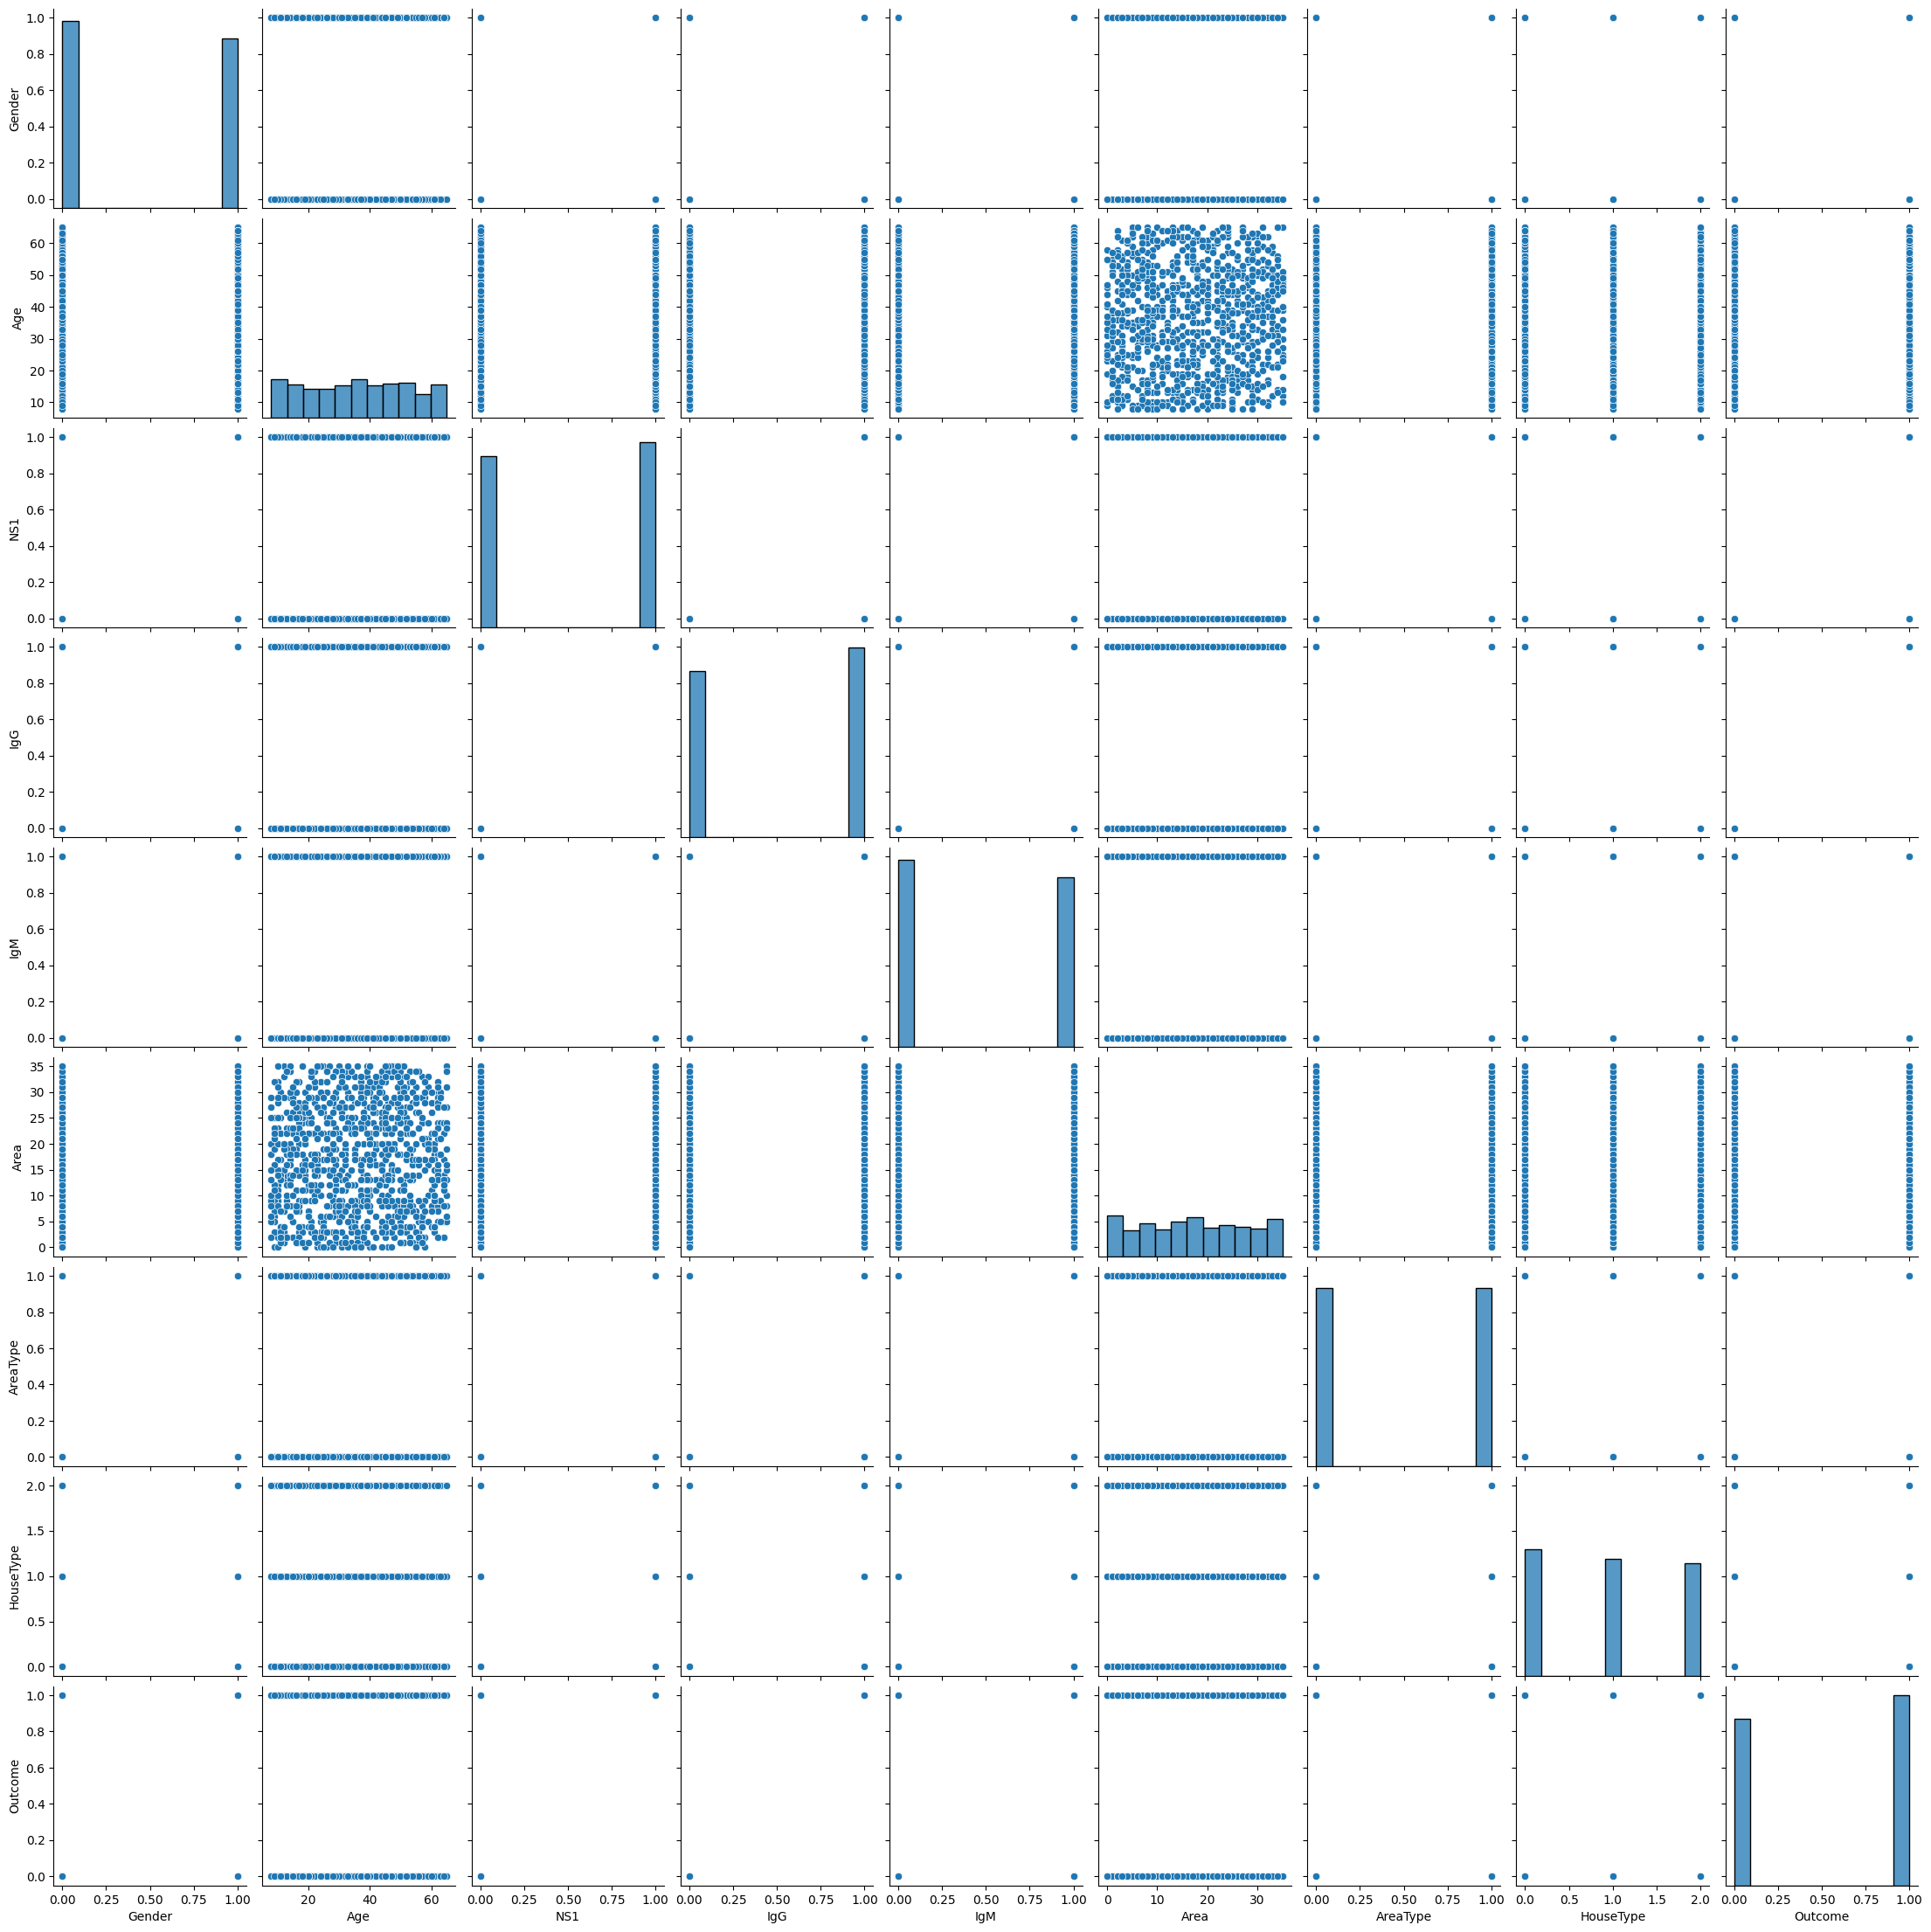

In [51]:
#scatter plot to understand the relationship
sns.pairplot(data)
plt.show()

In [52]:
data.select_dtypes(include="number").columns


Index(['Gender', 'Age', 'NS1', 'IgG', 'IgM', 'Area', 'AreaType', 'HouseType',
       'Outcome'],
      dtype='object')

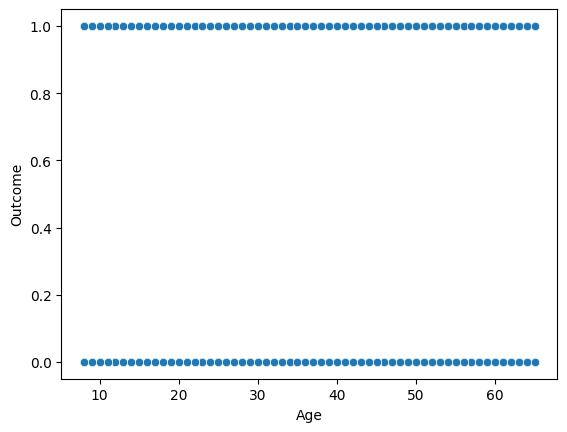

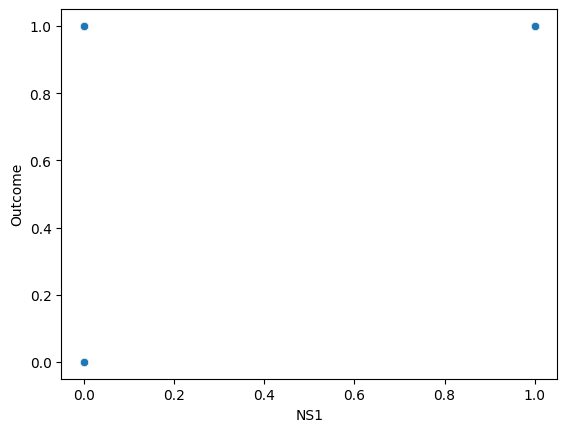

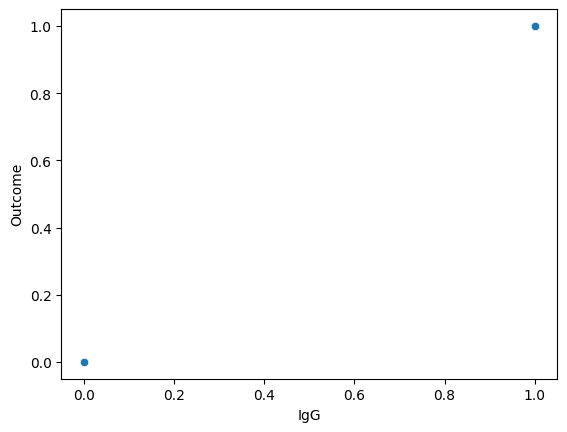

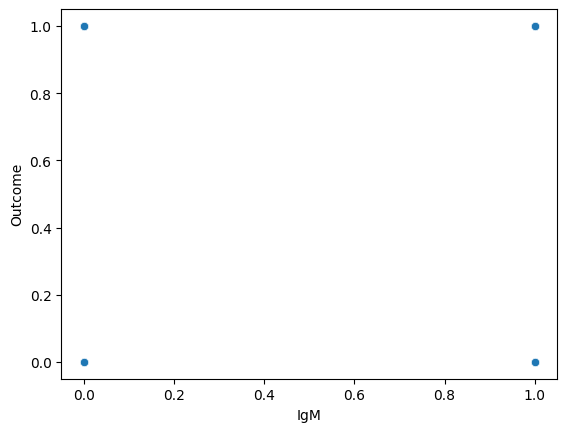

In [53]:
for i in ['Age', 'NS1', 'IgG', 'IgM']: # Corrected the for loop to iterate through the list of column names. Removed incorrect :'Outcome'
  sns.scatterplot(data=data,x=i,y='Outcome')
  plt.show()

In [54]:
s=data.select_dtypes(include="number").corr()
s

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,Outcome
Gender,1.000000,0.065223,-0.012199,-0.006855,-0.040497,-0.063588,0.013920,-0.013184,-0.006855
Age,0.065223,1.000000,-0.009917,-0.011750,0.048918,0.023171,0.018095,-0.008821,-0.011750
NS1,-0.012199,-0.009917,1.000000,0.972313,0.045991,-0.041671,0.040105,-0.004395,0.972313
IgG,-0.006855,-0.011750,0.972313,1.000000,0.023380,-0.031680,0.040220,0.004215,1.000000
IgM,-0.040497,0.048918,0.045991,0.023380,1.000000,0.022999,0.003905,-0.025511,0.023380
Area,-0.063588,0.023171,-0.041671,-0.031680,0.022999,1.000000,0.045021,-0.066868,-0.031680
AreaType,0.013920,0.018095,0.040105,0.040220,0.003905,0.045021,1.000000,0.032904,0.040220
HouseType,-0.013184,-0.008821,-0.004395,0.004215,-0.025511,-0.066868,0.032904,1.000000,0.004215
Outcome,-0.006855,-0.011750,0.972313,1.000000,0.023380,-0.031680,0.040220,0.004215,1.000000


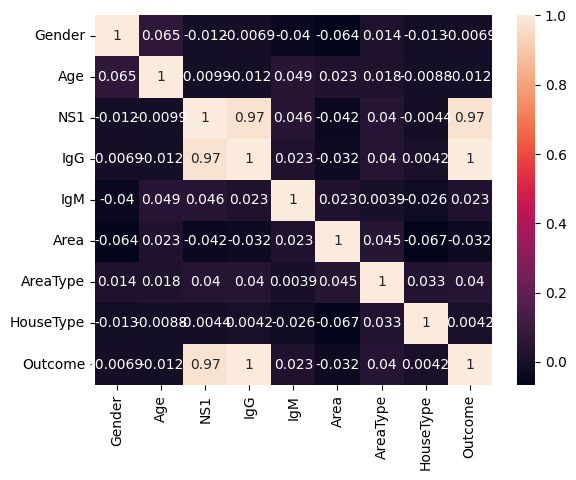

In [55]:
sns.heatmap(s,annot=True)
plt.show()

#Encoding Technique

In [56]:
pd.get_dummies(data,columns=['Gender','Area','AreaType'],drop_first=True)

,Age,NS1,IgG,IgM,HouseType,District,Outcome,Gender_1,Area_1,Area_2,...,Area_27,Area_28,Area_29,Area_30,Area_31,Area_32,Area_33,Area_34,Area_35,AreaType_1
0,45,0,0,0,0,Dhaka,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,17,0,0,1,0,Dhaka,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,29,0,0,0,1,Dhaka,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,63,1,1,0,1,Dhaka,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,22,0,0,0,0,Dhaka,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16,1,1,0,0,Dhaka,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,41,1,1,0,1,Dhaka,1,True,False,False,...,True,False,False,False,False,False,False,False,False,True
997,45,0,0,1,0,Dhaka,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
998,19,1,1,1,0,Dhaka,1,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt



In [58]:

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/dengue.csv")


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/dengue.csv")



In [61]:

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# List of categorical and numerical columns
categorical_features = ['Gender', 'Area', 'AreaType', 'HouseType', 'District'] # Added 'District' to categorical features
numerical_features = ['Age', 'NS1', 'IgG', 'IgM'] # Removed 'District' from numerical features



In [62]:

# Preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


**SHAP Values**

In [72]:
#get shap values
#get shap values
# Wrap the model's predict function to make it callable
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test('Age'))

TypeError: 'DataFrame' object is not callable

In [ ]:
# Calculate ROC curve and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


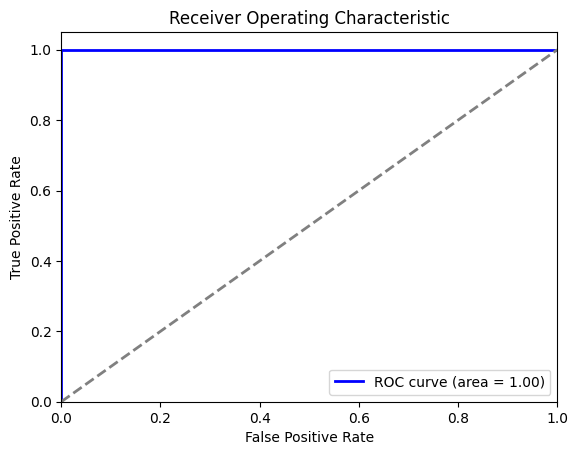

In [65]:

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



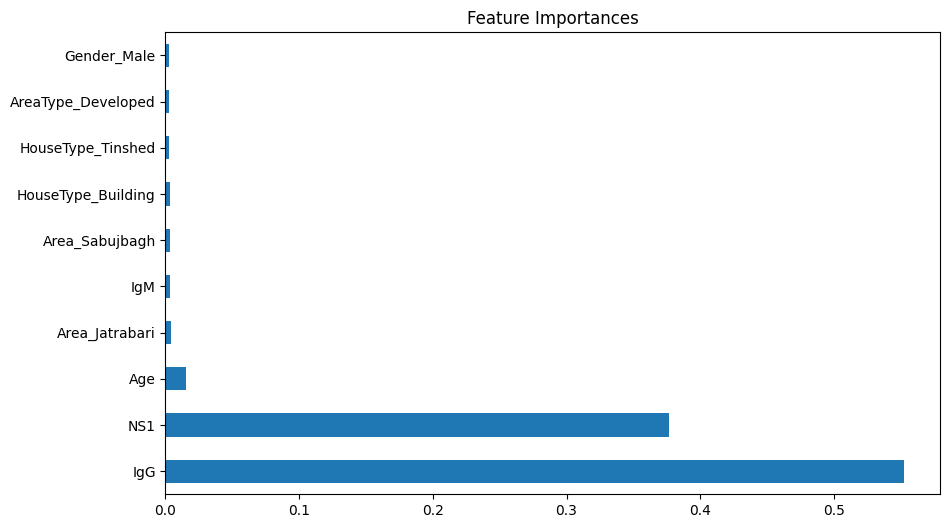

In [66]:

# Plot feature importance
importances = model.named_steps['classifier'].feature_importances_
# Get feature names using get_feature_names_out
features = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
feature_importances = pd.Series(importances, index=features)

plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()


In [ ]:


# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))


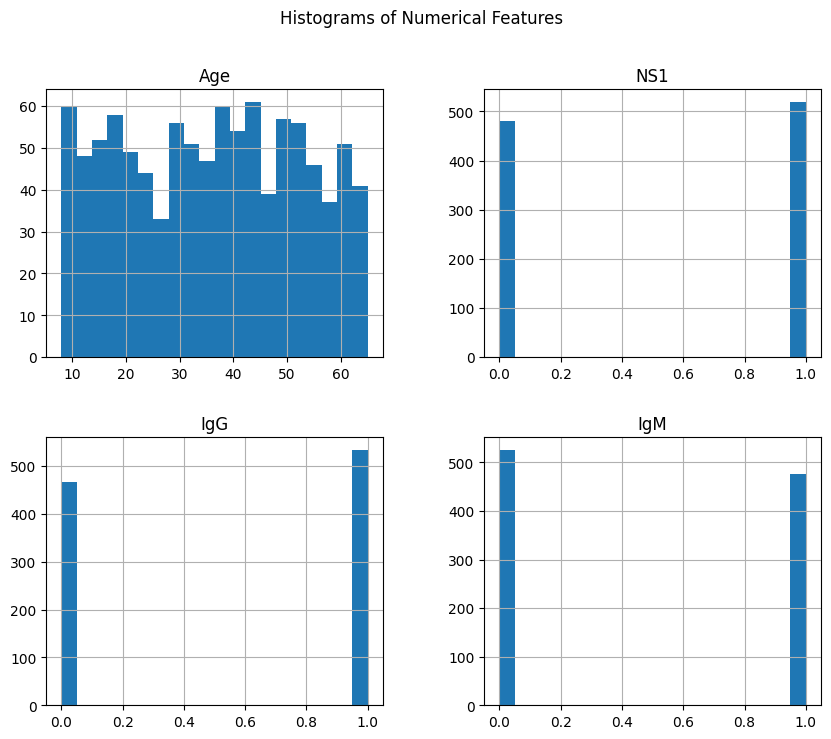

In [67]:

# Plot histograms for numerical features
data[numerical_features].hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()
